In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
transaction_raw = pd.read_csv("../data/transactions_train.csv")

Wall time: 25.5 s


In [3]:
#convert string t_dat to datetime
transaction_raw['t_dat'] = pd.to_datetime(transaction_raw['t_dat'])

#add year, month, week column
transaction_raw['year'] = transaction_raw['t_dat'].dt.year
transaction_raw['month'] = transaction_raw['t_dat'].dt.month
transaction_raw['week'] = transaction_raw['t_dat'].dt.isocalendar().week

In [4]:
#extract 2019 May, June, July data
mask = (transaction_raw['year']==2019) & (transaction_raw['month'] >= 5) & (transaction_raw['month'] <= 7)
transaction_subset = transaction_raw.loc[mask]
transaction_subset

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week
9590349,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,524061003,0.050831,2,2019,5,18
9590350,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,735404001,0.050831,2,2019,5,18
9590351,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,700370004,0.016932,2,2019,5,18
9590352,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,618800001,0.033881,2,2019,5,18
9590353,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,731407001,0.016932,2,2019,5,18
...,...,...,...,...,...,...,...,...
14864359,2019-07-31,ffdb44f83b6d23c1c9f805f5084392db7d4ff850df1373...,751989001,0.025407,2,2019,7,31
14864360,2019-07-31,ffe4bd3f42225fb51da4fe110a0fb2519efef670ff07ee...,757811001,0.013542,1,2019,7,31
14864361,2019-07-31,ffe4bd3f42225fb51da4fe110a0fb2519efef670ff07ee...,806388002,0.006763,1,2019,7,31
14864362,2019-07-31,fff221aba935ab52c5aeda592994e298c8170b2656b0e5...,759231002,0.059305,2,2019,7,31


In [7]:
%%time

articles_raw = pd.read_csv("../data/articles.csv")
articles_raw

Wall time: 603 ms


In [9]:
transaction_articles = pd.merge(transaction_subset, articles_raw, how='left', on='article_id' )
transaction_articles

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,prod_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,524061003,0.050831,2,2019,5,18,524061,s,...,Denim Other Garments,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,Short 5-pocket skirt in washed stretch denim w...
1,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,735404001,0.050831,2,2019,5,18,735404,Melrose,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,"Calf-length, V-neck dress in woven fabric with..."
2,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,700370004,0.016932,2,2019,5,18,700370,Cash Padded Balconette,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace balconette bra with moulded, lightly padd..."
3,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,618800001,0.033881,2,2019,5,18,618800,Leona,...,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,V-neck satin top with a lace trim at the top a...
4,2019-05-01,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,731407001,0.016932,2,2019,5,18,731407,Macarena,...,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,Top in a crinkled viscose weave with a V-neck ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274010,2019-07-31,ffdb44f83b6d23c1c9f805f5084392db7d4ff850df1373...,751989001,0.025407,2,2019,7,31,751989,Lace body,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,Wrapover body in cotton jersey with lace trims...
5274011,2019-07-31,ffe4bd3f42225fb51da4fe110a0fb2519efef670ff07ee...,757811001,0.013542,1,2019,7,31,757811,Barry Tee,...,Jersey Fancy,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in cotton jersey with a ribbed neckline.
5274012,2019-07-31,ffe4bd3f42225fb51da4fe110a0fb2519efef670ff07ee...,806388002,0.006763,1,2019,7,31,806388,Therese tee,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Wide T-shirt in soft cotton jersey with a ribb...
5274013,2019-07-31,fff221aba935ab52c5aeda592994e298c8170b2656b0e5...,759231002,0.059305,2,2019,7,31,759231,Amalfi,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,"Maxi dress in a striped weave with a wide, ela..."


In [10]:
transaction_articles.index_group_name.value_counts()

Ladieswear       3554714
Divided          1146719
Menswear          286347
Sport             157728
Baby/Children     128507
Name: index_group_name, dtype: int64

In [11]:
#get transations for menswear (2019 May, June, July data)
mask = transaction_articles.index_group_name == 'Menswear'
transation_menswear = transaction_articles.loc[mask]
transation_menswear

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,prod_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
60,2019-05-01,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001,0.050831,2,2019,5,18,743719,Kate Sneaker,...,Shoes,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Cotton canvas trainers with a padded edge and ...
140,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031,0.015237,2,2019,5,18,507431,Wet Tee,...,Jersey inactive from s1,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in hard-washed slub cotton jersey with...
141,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036,0.054220,2,2019,5,18,378447,V-Neck Milan TVP,...,Knitwear,F,Menswear,3,Menswear,23,Men Suits & Tailoring,1003,Knitwear,Jumper in fine-knit merino wool with a V-neck ...
142,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001,0.030492,2,2019,5,18,657850,KANE,...,Knitwear,F,Menswear,3,Menswear,20,Contemporary Smart,1003,Knitwear,Jumper in a textured-knit wool blend with long...
143,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015,0.013542,2,2019,5,18,598755,Taz Tee,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,"Long, round-necked T-shirt in soft jersey with..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273975,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,Parker tanktop,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
5273976,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,Parker tanktop,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
5273978,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,663793009,0.022864,1,2019,7,31,663793,Mischa 3pk Basic,...,Underwear Jersey,F,Menswear,3,Menswear,26,Men Underwear,1017,"Under-, Nightwear",Briefs in stretch cotton jersey with flatlock ...
5273979,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,501619019,0.022864,1,2019,7,31,501619,Victory voile shirt,...,Shirt,F,Menswear,3,Menswear,20,Contemporary Smart,1011,Shirts,Shirt in an airy cotton weave with a turn-down...


In [12]:
transation_menswear.week.value_counts()

26    33027
25    29118
30    25956
27    25914
22    22464
28    21961
29    20902
21    18696
23    17315
20    16647
24    16619
18    16320
19    13170
31     8238
Name: week, dtype: Int64

In [13]:
#save transation 2019 May June July Menswear data
transation_menswear.to_csv("../data/transation_2019_567_Menswear.csv")

In [ ]:
#Import Menswear dataset

In [3]:
##read 2019 567 Menswear transaction data 
transaction_men_raw = pd.read_csv("../data/large_data/transaction_2019_567_Menswear.csv")
transaction_men_raw.head()

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,60,2019-05-01,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001,0.050831,2,2019,5,18,743719,...,Shoes,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Cotton canvas trainers with a padded edge and ...
1,140,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031,0.015237,2,2019,5,18,507431,...,Jersey inactive from s1,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in hard-washed slub cotton jersey with...
2,141,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036,0.054220,2,2019,5,18,378447,...,Knitwear,F,Menswear,3,Menswear,23,Men Suits & Tailoring,1003,Knitwear,Jumper in fine-knit merino wool with a V-neck ...
3,142,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001,0.030492,2,2019,5,18,657850,...,Knitwear,F,Menswear,3,Menswear,20,Contemporary Smart,1003,Knitwear,Jumper in a textured-knit wool blend with long...
4,143,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015,0.013542,2,2019,5,18,598755,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,"Long, round-necked T-shirt in soft jersey with..."


In [54]:
print(transaction_men_raw.columns)

Index(['Unnamed: 0', 't_dat', 'customer_id', 'article_id', 'price',
       'sales_channel_id', 'year', 'month', 'week', 'product_code',
       'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [63]:
transaction_men_raw.article_id.value_counts()

685816001    1871
685816002    1665
575347003    1659
730013004    1163
471714008    1123
             ... 
466987027       1
601696001       1
651321002       1
631870004       1
634231002       1
Name: article_id, Length: 5228, dtype: int64

In [59]:
transaction_men_raw.detail_desc.value_counts().index

Index(['Round-necked T-shirt in soft cotton jersey.',
       'Short-sleeved polo shirt in soft jersey with a collar and button placket.',
       'V-neck T-shirt in soft cotton jersey.',
       '5-pocket shorts in washed denim with a regular waist, zip fly and button, and slim legs with sewn-in turn-ups at the hems.',
       'Knee-length shorts in a cotton weave with a button fly, side pockets and a welt back pocket with a button.',
       'Short-sleeved polo shirt in cotton jersey with a collar, button placket and slits in the sides.',
       'Knee-length shorts in soft washed cotton with an elasticated drawstring waist, fake fly, side pockets and welt back pockets with a button.',
       'Chino shorts in a washed cotton weave with a zip fly, side pockets, a coin pocket and welt back pockets. Regular fit.',
       'T-shirt in printed cotton jersey.',
       'Round-necked T-shirt in soft jersey.',
       ...
       'STUDIO COLLECTION. Suit trousers in twill made from a soft wool blend w

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

content = transaction_men_raw.detail_desc.value_counts().index

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(content)
vectorizer.get_feature_names()

X.shape
#(1923, 978)
#1023 items with 978 features

(1923, 978)

In [73]:
len(X.toarray()[0])

978

In [17]:
mask_train = transaction_men_raw.week == 18
X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
mask_test = transaction_men_raw.week == 19
X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]

In [18]:
X_train

,customer_id,article_id
0,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001
1,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031
2,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036
3,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001
4,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015
...,...,...
16315,ffc21861854c3e3cf2dbef233cff8ba29a1dca5ff38465...,617249019
16316,ffc21861854c3e3cf2dbef233cff8ba29a1dca5ff38465...,617249011
16317,ffd70e82342cd4417db5458ae282c1450587734a9e00f8...,575442001
16318,ffd70e82342cd4417db5458ae282c1450587734a9e00f8...,366859033


In [30]:
#test run for collaborative filtering
import collaborative_filter as cf

#compute recommended items for each user in the training
recommend_items = cf.all_user_collaborative_filter(X_train, similar_user_number = 150, max_recommend_items = 12)

recommend_items

{'00023e3dd8618bc63ccad995a5ac62e21177338d642d66b42e0038c6b10f655a': [721063001,
  730012004,
  736765011,
  671777027,
  755474001,
  617249004,
  581588002,
  721063009,
  730013001,
  755473001,
  725358005,
  687635002],
 '0019766e0e39e6eca054a9be24fd3492680abcc4ee674bc9ad52f1517531e549': [685816003,
  685816008,
  685604034,
  769483001,
  569996004,
  569997022,
  569997031,
  685816011,
  757812008,
  699755041,
  685812005,
  777702001],
 '001ddeb8fb74fec5693116da83b488e05ee9a9e179f3fd1ff67812cb511ced72': [762287002,
  584157003,
  615178001,
  730013001,
  589556001,
  607224001,
  618319004,
  687635005,
  755473001,
  699924005,
  730013003,
  471714008],
 '0026906d6c593cd34993ee283861e050272cb193026eb881b1aa3ace49ba75c5': [471714008,
  448262045,
  671777027,
  730013001,
  766974002,
  589549018,
  721063005,
  721063007,
  766974003,
  452898019,
  569978002,
  685812009],
 '003e74f3e9b59386dc240c99f325c7c9ae24c62952db1a35111f54167e75b194': [730863013,
  720504008,
  7367

In [33]:
'0019766e0e39e6eca054a9be24fd3492680abcc4ee674bc9ad52f1517531e549' in recommend_items

True

In [21]:
len(X_test.customer_id.unique())

5098

In [26]:
for wk in range(18,31):
    
    mask_train = transaction_men_raw.week == wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    print(wk, len(X_train), len(X_test))

18 16320 13170
19 13170 16647
20 16647 18696
21 18696 22464
22 22464 17315
23 17315 16619
24 16619 29118
25 29118 33027
26 33027 25914
27 25914 21961
28 21961 20902
29 20902 25956
30 25956 8238


## Run for top 12 sellers

In [23]:
AOP_results = []
MAP_results = []
num_users = []
timeline = []

# week 18 - 31
for wk in range(18,31):
    
    mask_train = transaction_men_raw.week == wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #print(wk, len(X_train), len(X_test))
    
    #find out top 12 selling items in training data
    top12items = list(X_train.article_id.value_counts()[0:12].index)
        
    #save top 12 selling items for users in a dict
    #to all users in test sets
    all_unique_users_in_test = X_test.customer_id.unique()
    top12_items = {}
    for user in all_unique_users_in_test:
        top12_items[user] = top12items

    #calculate AOP@12 for each train-test group
    AOP12_top, num_user = cf.AOP(top12_items, X_test)
    AOP_results.append(AOP12_top)

    #calculate MAP@12 for each train-test group
    MAP12_top, num_user = cf.MAP(top12_items, X_test)
    MAP_results.append(MAP12_top)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))

  4%|███                                                                           | 202/5098 [00:00<00:04, 996.78it/s]

Number of users: 5098


  3%|██▏                                                                           | 170/6158 [00:00<00:07, 842.09it/s]

Number of users: 5098


  3%|██▏                                                                           | 172/6158 [00:00<00:07, 853.68it/s]

Number of users: 6158


  2%|█▋                                                                            | 156/6984 [00:00<00:08, 776.82it/s]

Number of users: 6158


  2%|█▊                                                                            | 158/6984 [00:00<00:08, 784.28it/s]

Number of users: 6984


  2%|█▎                                                                            | 141/8212 [00:00<00:11, 695.77it/s]

Number of users: 6984


  1%|▋                                                                              | 68/8212 [00:00<00:12, 674.89it/s]

Number of users: 8212


  3%|██                                                                            | 167/6289 [00:00<00:07, 829.60it/s]

Number of users: 8212


  1%|█                                                                              | 84/6289 [00:00<00:07, 833.70it/s]

Number of users: 6289


  1%|█                                                                              | 83/6336 [00:00<00:07, 824.17it/s]

Number of users: 6289


  3%|██                                                                            | 168/6336 [00:00<00:07, 833.78it/s]

Number of users: 6336


  1%|▉                                                                             | 114/9897 [00:00<00:17, 566.87it/s]

Number of users: 6336


  1%|▉                                                                             | 112/9897 [00:00<00:17, 557.18it/s]

Number of users: 9897


  1%|▋                                                                            | 106/11093 [00:00<00:21, 518.01it/s]

Number of users: 9897


  1%|▋                                                                            | 106/11093 [00:00<00:21, 515.05it/s]

Number of users: 11093


  1%|▌                                                                              | 62/9243 [00:00<00:14, 615.19it/s]

Number of users: 11093


  1%|▌                                                                              | 62/9243 [00:00<00:14, 615.51it/s]

Number of users: 9243


  2%|█▎                                                                            | 140/8023 [00:00<00:11, 690.03it/s]

Number of users: 9243


  1%|▋                                                                              | 69/8023 [00:00<00:11, 684.83it/s]

Number of users: 8023


  1%|▊                                                                              | 73/7527 [00:00<00:10, 717.78it/s]

Number of users: 8023


  2%|█▌                                                                            | 147/7527 [00:00<00:10, 725.93it/s]

Number of users: 7527


  1%|█▏                                                                            | 128/8844 [00:00<00:13, 625.59it/s]

Number of users: 7527


  1%|▌                                                                              | 58/8844 [00:00<00:15, 575.79it/s]

Number of users: 8844


  8%|██████▍                                                                      | 261/3138 [00:00<00:02, 1296.61it/s]

Number of users: 8844


  8%|██████▍                                                                      | 260/3138 [00:00<00:02, 1289.69it/s]

Number of users: 3138


100%|████████████████████████████████████████████████████████████████████████████| 3138/3138 [00:02<00:00, 1262.87it/s]

Number of users: 3138


In [24]:
print(AOP_results)
print(MAP_results)
print(num_users)
print(timeline)

[0.011605858506603966, 0.008349572371982292, 0.00918766704849187, 0.009894057476863116, 0.010295754491970165, 0.009325021043771111, 0.008740022228958231, 0.011110610294780327, 0.010377222402538768, 0.008610661016245004, 0.010506620610247533, 0.01130710085933954, 0.008869768429997857]
[0.01365492833960854, 0.009068656081687899, 0.011962595256552853, 0.01213071447256182, 0.013124876145626662, 0.01114435924450128, 0.010182375460995258, 0.011514022727175229, 0.01140036807230906, 0.009271858693053988, 0.010901237747092684, 0.014435684636527038, 0.012055252745979319]
[5098, 6158, 6984, 8212, 6289, 6336, 9897, 11093, 9243, 8023, 7527, 8844, 3138]
['Wk_19', 'Wk_20', 'Wk_21', 'Wk_22', 'Wk_23', 'Wk_24', 'Wk_25', 'Wk_26', 'Wk_27', 'Wk_28', 'Wk_29', 'Wk_30', 'Wk_31']


In [25]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
result_df.to_csv("../data/topSell_allTestUsers.csv")

result_df.head()

,timeline,AOP,MAP,num_users
0,Wk_19,0.011606,0.013655,5098
1,Wk_20,0.008350,0.009069,6158
2,Wk_21,0.009188,0.011963,6984
3,Wk_22,0.009894,0.012131,8212
4,Wk_23,0.010296,0.013125,6289


## User-based collaborative filtering

In [27]:
AOP_results = []
MAP_results = []
num_users = []
timeline = []

# week 18 - 31
for wk in range(18,31):
    
    mask_train = transaction_men_raw.week == wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #print(wk, len(X_train), len(X_test))
    
    #Get recommended items via user-based collaborative filtering
    recommend_items = cf.all_user_collaborative_filter(X_train, 
                                                       similar_user_number = 200, max_recommend_items = 12) 

    #calculate AOP@12 for each train-test group
    AOP12_top, num_user = cf.AOP(recommend_items, X_test)
    AOP_results.append(AOP12_top)

    #calculate MAP@12 for each train-test group
    MAP12_top, num_user = cf.MAP(recommend_items, X_test)
    MAP_results.append(MAP12_top)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))

 31%|███████████████████████▌                                                    | 1861/5993 [00:00<00:00, 8642.13it/s]

Number of users: 379


100%|████████████████████████████████████████████████████████████████████████████| 5993/5993 [00:00<00:00, 8236.32it/s]


Number of users: 379


 29%|██████████████████████                                                      | 1477/5098 [00:00<00:00, 6961.83it/s]

Number of users: 334


100%|████████████████████████████████████████████████████████████████████████████| 5098/5098 [00:00<00:00, 6833.70it/s]


Number of users: 334


 21%|███████████████▉                                                            | 1288/6158 [00:00<00:00, 6037.43it/s]

Number of users: 447


100%|████████████████████████████████████████████████████████████████████████████| 6158/6158 [00:01<00:00, 5781.19it/s]


Number of users: 447


 17%|█████████████▎                                                              | 1218/6984 [00:00<00:00, 5904.22it/s]

Number of users: 533


100%|████████████████████████████████████████████████████████████████████████████| 6984/6984 [00:01<00:00, 4985.28it/s]


Number of users: 533


 17%|█████████████▏                                                              | 1423/8212 [00:00<00:00, 6858.96it/s]

Number of users: 534


100%|████████████████████████████████████████████████████████████████████████████| 8212/8212 [00:01<00:00, 6760.60it/s]


Number of users: 534


 12%|█████████                                                                    | 744/6289 [00:00<00:00, 7384.25it/s]

Number of users: 396


100%|████████████████████████████████████████████████████████████████████████████| 6289/6289 [00:00<00:00, 6833.83it/s]


Number of users: 396


 14%|██████████▌                                                                  | 869/6336 [00:00<00:01, 3919.57it/s]

Number of users: 583


100%|████████████████████████████████████████████████████████████████████████████| 6336/6336 [00:01<00:00, 3853.50it/s]


Number of users: 583


  3%|██▋                                                                          | 345/9897 [00:00<00:03, 3064.99it/s]

Number of users: 1003


100%|████████████████████████████████████████████████████████████████████████████| 9897/9897 [00:02<00:00, 3317.25it/s]


Number of users: 1003


  9%|██████▌                                                                     | 950/11093 [00:00<00:02, 4322.45it/s]

Number of users: 885


100%|██████████████████████████████████████████████████████████████████████████| 11093/11093 [00:02<00:00, 4515.25it/s]


Number of users: 885


 14%|██████████▍                                                                 | 1270/9243 [00:00<00:01, 5680.00it/s]

Number of users: 702


100%|████████████████████████████████████████████████████████████████████████████| 9243/9243 [00:01<00:00, 5278.95it/s]


Number of users: 702


 15%|███████████▋                                                                | 1240/8023 [00:00<00:01, 5518.17it/s]

Number of users: 575


100%|████████████████████████████████████████████████████████████████████████████| 8023/8023 [00:01<00:00, 5774.41it/s]


Number of users: 575


  7%|█████▍                                                                       | 534/7527 [00:00<00:01, 4725.75it/s]

Number of users: 615


100%|████████████████████████████████████████████████████████████████████████████| 7527/7527 [00:01<00:00, 4502.23it/s]


Number of users: 615


 17%|████████████▌                                                              | 1484/8844 [00:00<00:00, 13090.88it/s]

Number of users: 351


100%|███████████████████████████████████████████████████████████████████████████| 8844/8844 [00:00<00:00, 14025.96it/s]

Number of users: 351


In [28]:
print(AOP_results)
print(MAP_results)
print(num_users)
print(timeline)

[0.012532981530343006, 0.007734530938123753, 0.011372110365398952, 0.010631644777986239, 0.008895131086142321, 0.011363636363636366, 0.00857632933104631, 0.010884014622798276, 0.009416195856873812, 0.008190883190883185, 0.010579710144927526, 0.009891598915989156, 0.012820512820512824]
[0.01804614019323782, 0.011129085623846104, 0.016208317326885564, 0.012933859275322687, 0.010147950433530959, 0.014353651048726808, 0.009661364935807477, 0.011560436535511316, 0.011357420043860726, 0.01075796203111018, 0.013792631281761718, 0.013228539752930002, 0.01686512218919626]
[379, 334, 447, 533, 534, 396, 583, 1003, 885, 702, 575, 615, 351]
['Wk_19', 'Wk_20', 'Wk_21', 'Wk_22', 'Wk_23', 'Wk_24', 'Wk_25', 'Wk_26', 'Wk_27', 'Wk_28', 'Wk_29', 'Wk_30', 'Wk_31']


In [29]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
result_df.to_csv("../data/user_based_cf.csv")

result_df.head()

,timeline,AOP,MAP,num_users
0,Wk_19,0.012533,0.018046,379
1,Wk_20,0.007735,0.011129,334
2,Wk_21,0.011372,0.016208,447
3,Wk_22,0.010632,0.012934,533
4,Wk_23,0.008895,0.010148,534


## User-based CF with top sellers

In [34]:
AOP_results = []
MAP_results = []
num_users = []
timeline = []

# week 18 - 31
for wk in range(18,31):
    
    mask_train = transaction_men_raw.week == wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #print(wk, len(X_train), len(X_test))
    
    #find out top 12 selling items in training data
    top12items = list(X_train.article_id.value_counts()[0:12].index)
        
    #Get recommended items via user-based collaborative filtering
    recommend_items = cf.all_user_collaborative_filter(X_train, 
                                                       similar_user_number = 200, max_recommend_items = 12)
    #identify all unique users in test data
    all_unique_users_in_test = X_test.customer_id.unique()
    
    #add top12items to user not found in the above recommend_items
    for user in all_unique_users_in_test:
        if user not in recommend_items:
            recommend_items[user] = top12items
    
    #calculate AOP@12 for each train-test group
    AOP12_top, num_user = cf.AOP(recommend_items, X_test)
    AOP_results.append(AOP12_top)

    #calculate MAP@12 for each train-test group
    MAP12_top, num_user = cf.MAP(recommend_items, X_test)
    MAP_results.append(MAP12_top)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))

 10%|███████▌                                                                   | 1075/10712 [00:00<00:01, 9562.69it/s]

Number of users: 5098


100%|██████████████████████████████████████████████████████████████████████████| 10712/10712 [00:05<00:00, 2113.07it/s]


Number of users: 5098


 14%|██████████▏                                                                | 1477/10922 [00:00<00:01, 7255.11it/s]

Number of users: 6158


100%|██████████████████████████████████████████████████████████████████████████| 10922/10922 [00:07<00:00, 1545.02it/s]


Number of users: 6158


 11%|████████                                                                   | 1365/12695 [00:00<00:01, 6409.92it/s]

Number of users: 6984


100%|██████████████████████████████████████████████████████████████████████████| 12695/12695 [00:08<00:00, 1489.68it/s]


Number of users: 6984


  8%|██████▎                                                                    | 1237/14663 [00:00<00:02, 6007.62it/s]

Number of users: 8212


100%|██████████████████████████████████████████████████████████████████████████| 14663/14663 [00:11<00:00, 1271.74it/s]


Number of users: 8212


 11%|████████▎                                                                  | 1546/13967 [00:00<00:01, 7191.72it/s]

Number of users: 6289


100%|██████████████████████████████████████████████████████████████████████████| 13967/13967 [00:07<00:00, 1870.59it/s]


Number of users: 6289


 13%|█████████▌                                                                 | 1567/12229 [00:00<00:01, 7402.44it/s]

Number of users: 6336


100%|██████████████████████████████████████████████████████████████████████████| 12229/12229 [00:07<00:00, 1671.22it/s]


Number of users: 6336


  5%|███▊                                                                        | 797/15650 [00:00<00:03, 3963.65it/s]

Number of users: 9897


100%|███████████████████████████████████████████████████████████████████████████| 15650/15650 [00:16<00:00, 958.33it/s]


Number of users: 9897


  3%|██▌                                                                         | 687/19987 [00:00<00:05, 3419.12it/s]

Number of users: 11093


100%|███████████████████████████████████████████████████████████████████████████| 19987/19987 [00:20<00:00, 979.11it/s]


Number of users: 11093


  5%|███▊                                                                        | 960/19451 [00:00<00:04, 4527.58it/s]

Number of users: 9243


100%|██████████████████████████████████████████████████████████████████████████| 19451/19451 [00:14<00:00, 1324.75it/s]


Number of users: 9243


  8%|█████▊                                                                     | 1276/16564 [00:00<00:02, 5812.45it/s]

Number of users: 8023


100%|██████████████████████████████████████████████████████████████████████████| 16564/16564 [00:11<00:00, 1473.07it/s]


Number of users: 8023


  8%|█████▋                                                                     | 1128/14975 [00:00<00:02, 5624.37it/s]

Number of users: 7527


100%|██████████████████████████████████████████████████████████████████████████| 14975/14975 [00:10<00:00, 1491.27it/s]


Number of users: 7527


  6%|████▊                                                                       | 987/15756 [00:00<00:03, 4876.36it/s]

Number of users: 8844


100%|██████████████████████████████████████████████████████████████████████████| 15756/15756 [00:13<00:00, 1165.76it/s]


Number of users: 8844


 26%|███████████████████▍                                                      | 3051/11631 [00:00<00:00, 14495.78it/s]

Number of users: 3138


100%|██████████████████████████████████████████████████████████████████████████| 11631/11631 [00:02<00:00, 4491.16it/s]

Number of users: 3138


In [35]:
print(AOP_results)
print(MAP_results)
print(num_users)
print(timeline)

[0.011426049431149537, 0.00830897477536001, 0.009366647575410534, 0.01004627374573792, 0.010216250596279276, 0.009719591750841822, 0.00880738270856485, 0.01100543886535036, 0.010097731616718876, 0.008496406165607255, 0.010750188211328074, 0.010967887833559365, 0.009294667516464817]
[0.013329728778188894, 0.009108300738091244, 0.012210020984541294, 0.012349661357972415, 0.01300462028916473, 0.011742486398223454, 0.010132665516872861, 0.011418275750512357, 0.01091459947824229, 0.009127326606760718, 0.011394002035193765, 0.014074367289117415, 0.01256070849163583]
[5098, 6158, 6984, 8212, 6289, 6336, 9897, 11093, 9243, 8023, 7527, 8844, 3138]
['Wk_19', 'Wk_20', 'Wk_21', 'Wk_22', 'Wk_23', 'Wk_24', 'Wk_25', 'Wk_26', 'Wk_27', 'Wk_28', 'Wk_29', 'Wk_30', 'Wk_31']


In [36]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
result_df.to_csv("../data/userCF_plus_topSell.csv")

result_df.head()

,timeline,AOP,MAP,num_users
0,Wk_19,0.011426,0.013330,5098
1,Wk_20,0.008309,0.009108,6158
2,Wk_21,0.009367,0.012210,6984
3,Wk_22,0.010046,0.012350,8212
4,Wk_23,0.010216,0.013005,6289


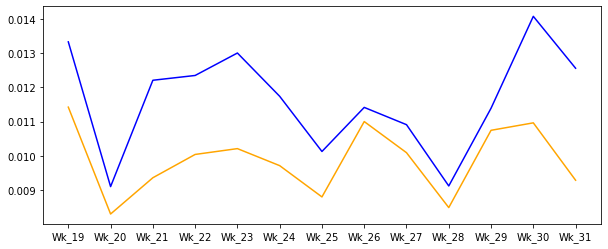

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(result_df.timeline, result_df.AOP, color="orange")
plt.plot(result_df.timeline, result_df.MAP, color="blue")

In [47]:
topSell_df = pd.read_csv("../data/topSell_allTestUsers.csv").iloc[:,1:] 
userCF_df = pd.read_csv("../data/user_based_cf.csv").iloc[:,1:] 
userCF_topSell_df = pd.read_csv("../data/userCF_plus_topSell.csv").iloc[:,1:]

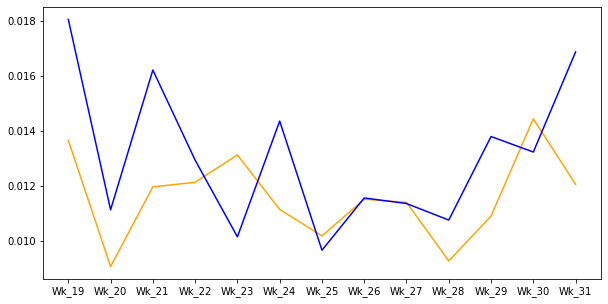

In [51]:
plt.figure(figsize=(10,5))
plt.plot(topSell_df.timeline, topSell_df.MAP, color="orange")
plt.plot(userCF_df.timeline, userCF_df.MAP, color="blue")

In [53]:
print(topSell_df.AOP.mean())
print(userCF_df.AOP.mean())

0.009859995137060708
0.010222252303435476
